## Conjoint Analysis

## Step 1: Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Step 2: Loading the Dataset

In [2]:
amenities=pd.read_csv("hotel_amenities.csv")
amenities

,WiFi_Network,breakfast,parking,gym,flex_check,shuttle_bus,air_pure,jacuzzi,VIP_shop,pool_temp,avg_rating
0,Basic,NaN,Valet,NaN,No,No,No,No,No,76,4.57
1,Basic,NaN,Valet,NaN,No,No,No,No,No,80,7.60
2,Basic,NaN,Valet,NaN,No,No,No,No,No,84,5.66
3,Basic,NaN,Valet,NaN,No,No,No,No,Yes,76,2.80
4,Basic,NaN,Valet,NaN,No,No,No,No,Yes,80,4.56
...,...,...,...,...,...,...,...,...,...,...,...
6907,Best in Class,Full Buffet,Open Lot,Super,Yes,Yes,Yes,Yes,No,80,8.21
6908,Best in Class,Full Buffet,Open Lot,Super,Yes,Yes,Yes,Yes,No,84,8.21
6909,Best in Class,Full Buffet,Open Lot,Super,Yes,Yes,Yes,Yes,Yes,76,8.21
6910,Best in Class,Full Buffet,Open Lot,Super,Yes,Yes,Yes,Yes,Yes,80,8.21


## Step 3: Exploring the Dataset

### Data Types

In [3]:
amenities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6912 entries, 0 to 6911
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WiFi_Network  6912 non-null   object 
 1   breakfast     4608 non-null   object 
 2   parking       6912 non-null   object 
 3   gym           5184 non-null   object 
 4   flex_check    6912 non-null   object 
 5   shuttle_bus   6912 non-null   object 
 6   air_pure      6912 non-null   object 
 7   jacuzzi       6912 non-null   object 
 8   VIP_shop      6912 non-null   object 
 9   pool_temp     6912 non-null   int64  
 10  avg_rating    6912 non-null   float64
dtypes: float64(1), int64(1), object(9)
memory usage: 594.1+ KB


### Missing Values

In [4]:
def check_missing_values(df):
    # Iterate over each column in the DataFrame
    for column in df.columns:
        # Calculate the number of missing values
        missing_count = df[column].isnull().sum()
        # Calculate the percentage of missing values
        missing_percentage = (missing_count / len(df)) * 100
        # Print the results
        if missing_count > 0:
            print(f"Column '{column}' has {missing_count} missing values, which is {missing_percentage:.2f}% of the total.")

# Assuming 'amenities' is your DataFrame
check_missing_values(amenities)

Column 'breakfast' has 2304 missing values, which is 33.33% of the total.
Column 'gym' has 1728 missing values, which is 25.00% of the total.


### Function for displaying unique values in  each column:

In [5]:
def display_unique_types(df):
    """
    Display each unique type in every column of a DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.

    Returns:
    None
    """
    for column_name in df.columns:
        unique_values = df[column_name].unique()
        print(f"Unique types in column '{column_name}':")
        for value in unique_values:
            print(value)
        print("\n")  # Add a newline for better readability between columns


display_unique_types(amenities)

Unique types in column 'WiFi_Network':
Basic
Strong
Best in Class


Unique types in column 'breakfast':
nan
Continental
Full Buffet


Unique types in column 'parking':
Valet
Open Lot


Unique types in column 'gym':
nan
Basic
Advanced
Super


Unique types in column 'flex_check':
No
Yes


Unique types in column 'shuttle_bus':
No
Yes


Unique types in column 'air_pure':
No
Yes


Unique types in column 'jacuzzi':
No
Yes


Unique types in column 'VIP_shop':
No
Yes


Unique types in column 'pool_temp':
76
80
84


Unique types in column 'avg_rating':
4.57
7.6
5.66
2.8
4.56
5.12
2.44
2.66
4.22
7.39
6.78
7.28
6.71
3.78
6.77
7.69
2.51
5.49
4.07
5.08
5.56
3.42
7.83
3.17
3.68
5.51
5.15
4.95
5.72
5.89
4.89
5.91
7.36
8.67
3.29
6.43
2.81
4.32
6.62
8.08
5.09
7.08
4.63
2.42
7.48
6.36
4.34
6.88
6.32
7.17
6.03
6.91
7.33
6.15
2.85
4.24
9.19
9.71
8.17
2.65
5.03
6.14
4.83
5.65
7.57
2.78
5.04
7.05
4.31
5.21
6.64
9.09
5.76
8.07
4.48
7.22
5.01
4.11
6.63
9.84
5.96
8.25
5.84
7.78
4.75
9.0
3.75
8.34
7.84
6.66
7.4

<strong>RESULT</strong><br>
We have NaN in 'breakfast' and 'gym' columns. NaN represents type of the feature. So, it's better to replace with None.

### Making sure the Average Rating Column Does Not Have Anomaly Records

In [6]:
amenities['avg_rating'].describe()

count    6912.000000
mean        7.370858
std         1.656300
min         2.130000
25%         6.347500
50%         7.970000
75%         8.280000
max        10.000000
Name: avg_rating, dtype: float64

## Step 4: Handling Missing Values

In [7]:
def fill_missing_with_none(df):
    # Fill NA/null values with 'None' for all columns
    df_filled = df.fillna('None')
    return df_filled

# Assuming 'amenities' is your DataFrame
amenities = fill_missing_with_none(amenities)

In [8]:
print(check_missing_values(amenities))

None


In [9]:
amenities['breakfast'].unique()

array(['None', 'Continental', 'Full Buffet'], dtype=object)

In [10]:
amenities['gym'].unique()

array(['None', 'Basic', 'Advanced', 'Super'], dtype=object)

## Step 5: Choosing Columns for Conjoint Analysis

### Feature Columns

In [11]:
columns_to_encode = ['WiFi_Network', 'breakfast', 'parking', 'gym', 'flex_check', 
                     'shuttle_bus','air_pure','jacuzzi','VIP_shop','pool_temp']  

### Checking data types

In [12]:
amenities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6912 entries, 0 to 6911
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WiFi_Network  6912 non-null   object 
 1   breakfast     6912 non-null   object 
 2   parking       6912 non-null   object 
 3   gym           6912 non-null   object 
 4   flex_check    6912 non-null   object 
 5   shuttle_bus   6912 non-null   object 
 6   air_pure      6912 non-null   object 
 7   jacuzzi       6912 non-null   object 
 8   VIP_shop      6912 non-null   object 
 9   pool_temp     6912 non-null   int64  
 10  avg_rating    6912 non-null   float64
dtypes: float64(1), int64(1), object(9)
memory usage: 594.1+ KB


## Step 6: Dummify for Conjoint Analysis

### Dummify the Feature Columns

In [13]:
# Apply get_dummies with drop_first=True
amenities_encoded = pd.get_dummies(amenities, columns=columns_to_encode, drop_first=True)

### Displaying new Dataset Columns

In [14]:
amenities_encoded.columns

Index(['avg_rating', 'WiFi_Network_Best in Class', 'WiFi_Network_Strong',
       'breakfast_Full Buffet', 'breakfast_None', 'parking_Valet', 'gym_Basic',
       'gym_None', 'gym_Super', 'flex_check_Yes', 'shuttle_bus_Yes',
       'air_pure_Yes', 'jacuzzi_Yes', 'VIP_shop_Yes', 'pool_temp_80',
       'pool_temp_84'],
      dtype='object')

### Checking Data Types

In [15]:
amenities_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6912 entries, 0 to 6911
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   avg_rating                  6912 non-null   float64
 1   WiFi_Network_Best in Class  6912 non-null   bool   
 2   WiFi_Network_Strong         6912 non-null   bool   
 3   breakfast_Full Buffet       6912 non-null   bool   
 4   breakfast_None              6912 non-null   bool   
 5   parking_Valet               6912 non-null   bool   
 6   gym_Basic                   6912 non-null   bool   
 7   gym_None                    6912 non-null   bool   
 8   gym_Super                   6912 non-null   bool   
 9   flex_check_Yes              6912 non-null   bool   
 10  shuttle_bus_Yes             6912 non-null   bool   
 11  air_pure_Yes                6912 non-null   bool   
 12  jacuzzi_Yes                 6912 non-null   bool   
 13  VIP_shop_Yes                6912 

## Step 7: Feature Columns Choosing for Conjoint Analysis

In [16]:
feature_columns = ['WiFi_Network_Best in Class', 'WiFi_Network_Strong',
                   'breakfast_Full Buffet', 'breakfast_None', 'parking_Valet',
                   'gym_Basic', 'gym_None', 'gym_Super', 'flex_check_Yes',
                   'shuttle_bus_Yes', 'air_pure_Yes', 'jacuzzi_Yes',
                   'VIP_shop_Yes', 'pool_temp_80', 'pool_temp_84']

## Step 8: Assign X  for Feature Variables and y for Outcome Variable

In [17]:
# Assign X and y
X = amenities_encoded[feature_columns]
y = amenities_encoded['avg_rating']

## Step 9: Linear Model

In [18]:
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

### Coefficient

In [19]:
coef_amenities = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coef_amenities

,Coefficient
WiFi_Network_Best in Class,1.726814
WiFi_Network_Strong,1.187700
breakfast_Full Buffet,0.500998
breakfast_None,-0.225924
parking_Valet,0.093678
gym_Basic,-0.146314
gym_None,-0.168484
gym_Super,0.044363
flex_check_Yes,0.478220
shuttle_bus_Yes,0.419939


In [20]:
amenities_coef_sorted = coef_amenities.sort_values(by='Coefficient', ascending=True)
amenities_coef_sorted

,Coefficient
breakfast_None,-0.225924
gym_None,-0.168484
gym_Basic,-0.146314
gym_Super,0.044363
pool_temp_80,0.074744
air_pure_Yes,0.075258
parking_Valet,0.093678
jacuzzi_Yes,0.183909
VIP_shop_Yes,0.217925
pool_temp_84,0.263806


## Step 10: Visualization

In [21]:
coef_amenities = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])

#### Linear Regression Coefficients:

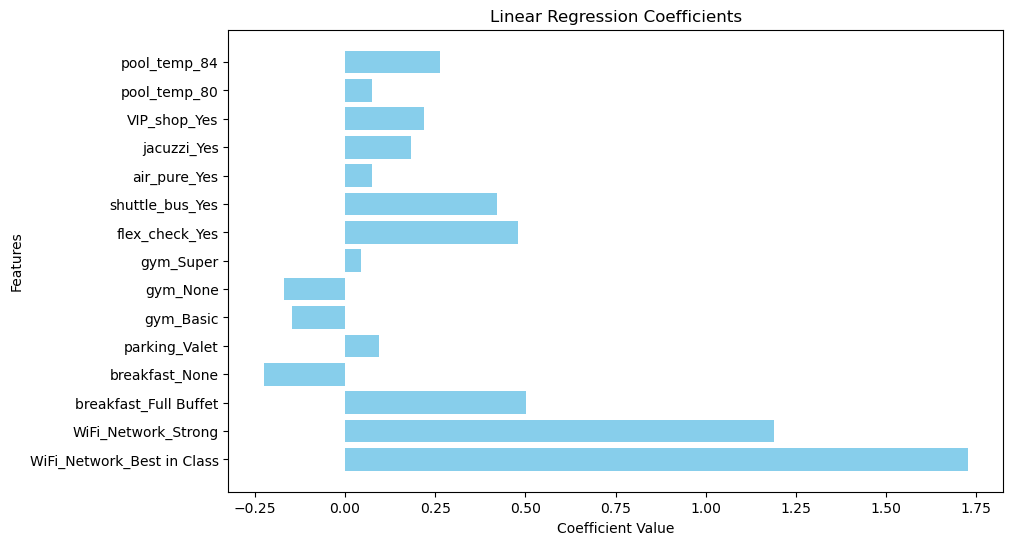

In [22]:
# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(coef_amenities.index, coef_amenities['Coefficient'], color='skyblue')
plt.title('Linear Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.show()

#### Sorted Linear Regression Coefficients:

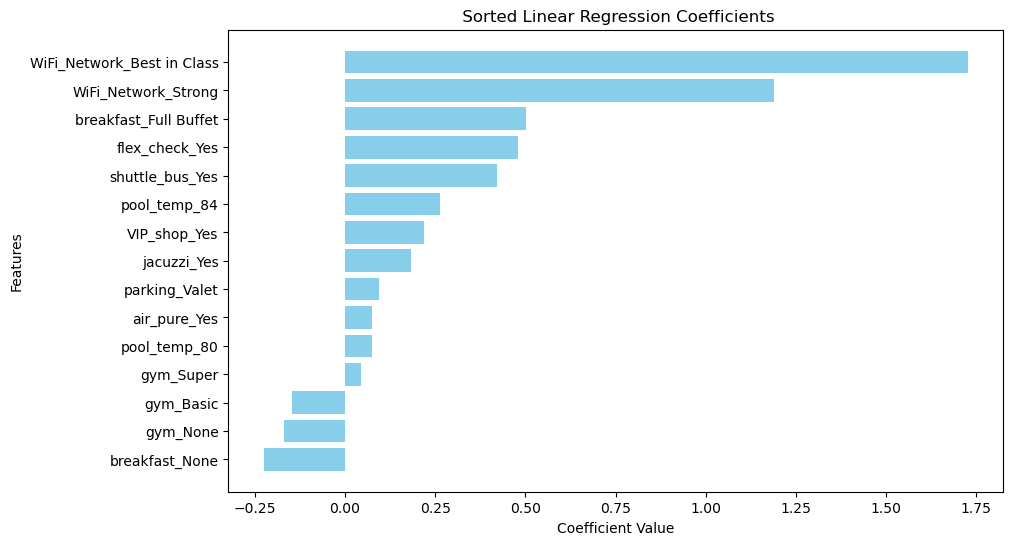

In [23]:
# Create a sorted horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(amenities_coef_sorted.index, amenities_coef_sorted['Coefficient'], color='skyblue')
plt.title(' Sorted Linear Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.show()

<br>

<strong>RESULT</strong><br>
This analysis looks at how different amenities affect a key outcome, like customer satisfaction.<br>
It turns out that having top-notch WiFi is really important, with WiFi_Network_Best in Class and WiFi_Network_Strong showing the biggest positive impacts.<br>
Other amenities, like offering a full breakfast buffet, flexible check-in options, and a shuttle bus, also help boost satisfaction, though not as much as WiFi. On the flip side, not having breakfast options or only having basic gym facilities seems to have a negative effect. This suggests that improving WiFi quality and providing better breakfast and gym options could make a big difference.<br>
By focusing on both enhancing popular amenities and fixing those that aren't performing well, businesses can better meet customer needs and improve overall satisfaction.

<br>